In [1]:
import numpy as np
import sys
sys.path.append('../src/')
from transformations import KernelTransform, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = np.load("../data/eb_subset_all.npz")

In [3]:
Xo = data['dist'].flatten().reshape(-1,1)
X = Xo
# ss = StandardScaler()
# X = ss.fit_transform(Xo)
# ms = MinMaxScaler()
# X = ms.fit_transform(Xo)

In [4]:
ktg = KernelTransform('gaussian', use_std=True)
Xg = ktg.fit_transform(X)
kta = KernelTransform('alpha_decaying', use_std=True)
Xa = kta.fit_transform(X)

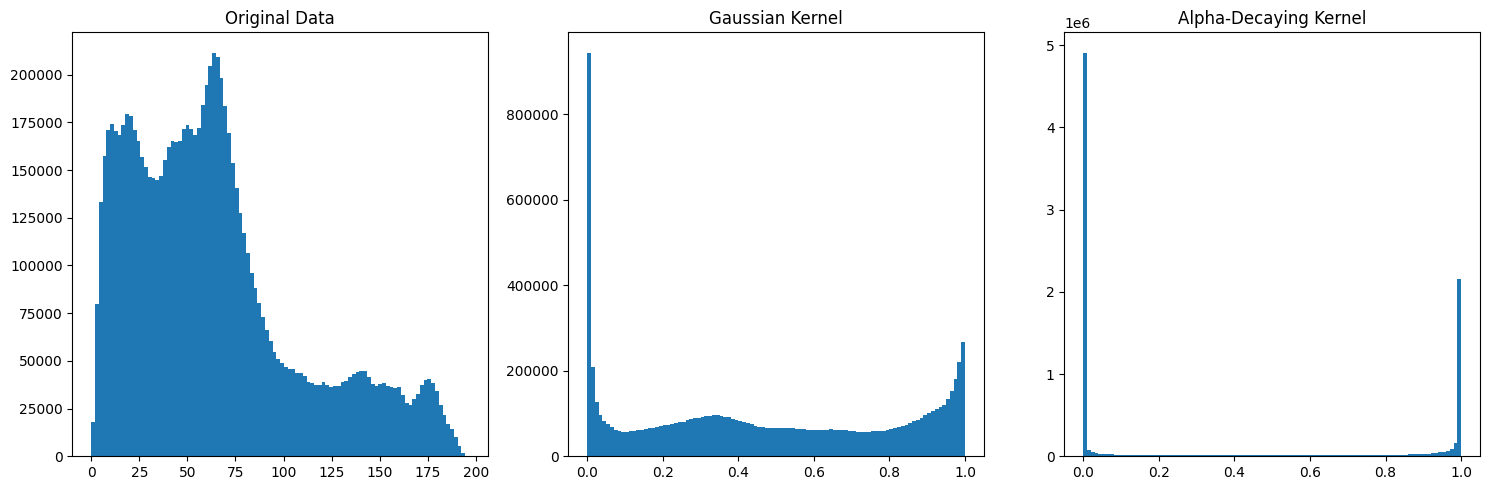

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(Xo.flatten(), bins=100)
axs[0].set_title('Original Data')

axs[1].hist(Xg.flatten(), bins=100)
axs[1].set_title('Gaussian Kernel')

axs[2].hist(Xa.flatten(), bins=100)
axs[2].set_title('Alpha-Decaying Kernel')

plt.tight_layout()
plt.show()


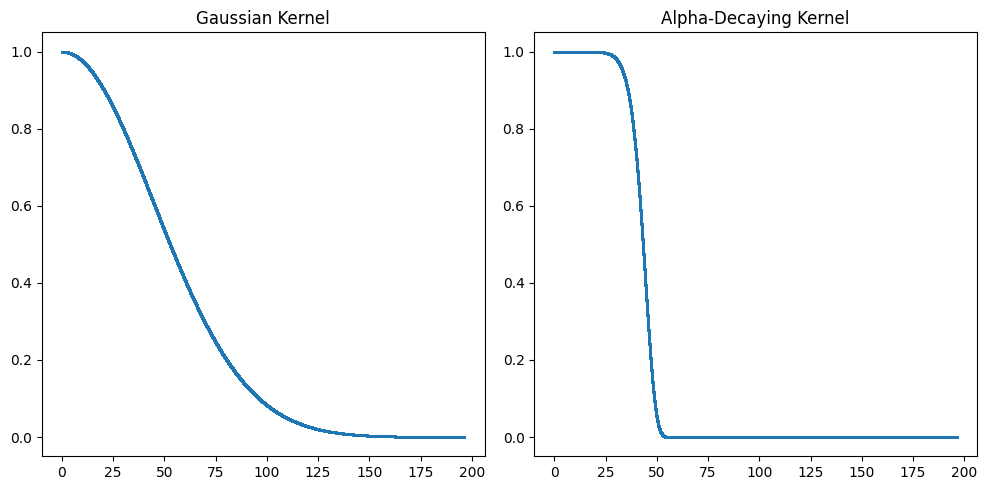

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(Xo.flatten(), Xg.flatten(), s=1)
axs[0].set_title('Gaussian Kernel')

axs[1].scatter(Xo.flatten(), Xa.flatten(), s=1)
axs[1].set_title('Alpha-Decaying Kernel')

plt.tight_layout()
plt.show()
